In [137]:
import pandas as pd

df = pd.read_csv('part1/data.csv')
df = df.dropna(subset=['value'])
df = df.drop(["Unnamed: 0"], axis=1)
df.columns = ['YEAR', 'MONTH', 'DAY','City','Type','Value']

In [138]:
df_w = pd.read_csv('Data/average_daily_weather.csv')

In [139]:
merged_df = pd.merge(df, df_w, on=['YEAR','MONTH','DAY','City'], how='inner')
merged_df = merged_df.drop(["Humidity"], axis=1)
merged_df = merged_df.dropna()

In [140]:
PM10 = merged_df[merged_df['Type']=='PM10']
PM2_5 = merged_df[merged_df['Type']=='PM2,5']

In [141]:
city_dict = {city: i+1 for i, city in enumerate(PM10['City'].unique())}
PM10.loc[:, 'City'] = PM10['City'].replace(city_dict)
PM2_5.loc[:, 'City'] = PM2_5['City'].replace(city_dict)

/var/folders/cb/vb_vwtjs4lb6ny7_6h2tg1v00000gn/T/ipykernel_17181/563031129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM10.loc[:, 'City'] = PM10['City'].replace(city_dict)
/var/folders/cb/vb_vwtjs4lb6ny7_6h2tg1v00000gn/T/ipykernel_17181/563031129.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM2_5.loc[:, 'City'] = PM2_5['City'].replace(city_dict)


In [142]:
PM10_train = PM10[PM10['YEAR']<=2018]
PM10_test = PM10[PM10['YEAR']==2019]
PM2_5_train = PM2_5[PM2_5['YEAR']<=2018]
PM2_5_test = PM2_5[PM2_5['YEAR']==2019]

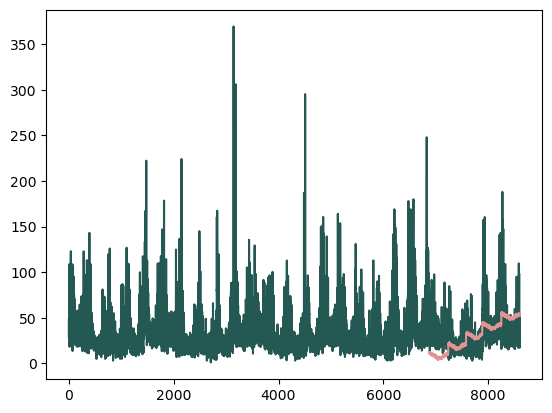

In [157]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

x_train = PM10_train[['Temperature', 'Wind', 'City']]
x_test = PM10_test[['Temperature', 'Wind', 'City']]
y_train = PM10_train[['Value']]
y_test = PM10_test[['Value']]
model = sm.OLS(np.asarray(y_train), np.asarray(x_train))
results = model.fit()
#print(results.predict(x_test))
end = len(y_train)+1
plt.plot(list(np.arange(1, end)), y_train, color='#245953')
end2 = len(y_train)+2+len(y_test)
plt.plot(list(np.arange(end+1, end2)), y_test, color='#245953')
plt.plot(list(np.arange(len(y_train)+2, len(y_train)+2+len(y_test))), results.predict(x_test), color='#E49393')
#print(results.summary())

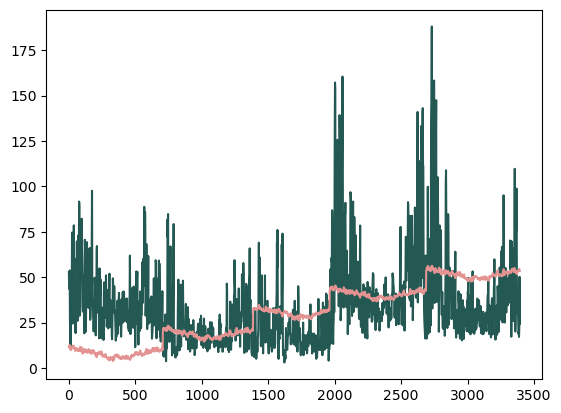

In [158]:
plt.plot(y_test, color='#245953')
plt.plot(results.predict(x_test), color='#E49393')

sm.OLS (ang. ordinary least squares) to funkcja biblioteki statsmodels w języku Python, służąca do wykonywania prostych modeli regresji liniowej, czyli szuka liniowej zależności między zmiennymi objaśniającymi (independent variable) a zmienną zależną (dependent variable).

Funkcja sm.OLS umożliwia dopasowanie modelu liniowego do danych i oszacowanie wartości współczynników regresji, takich jak nachylenie i wyraz wolny prostej regresji. Można także obliczyć różne miary jakości dopasowania modelu, takie jak R-kwadrat i błąd standardowy.

## Warszawa

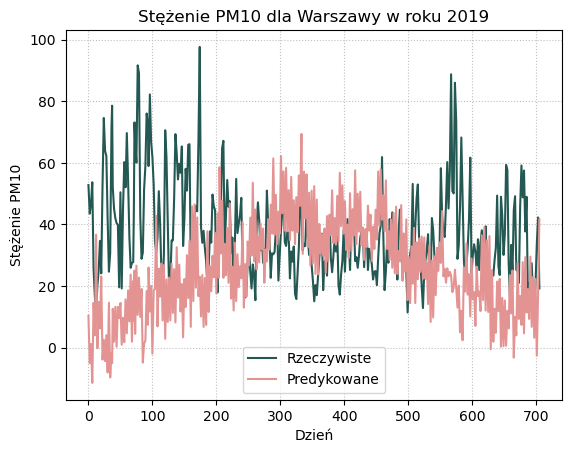

In [162]:
PM10_train_War=PM10_train.loc[PM10_train['City'] == 1]
PM10_test_War=PM10_test.loc[PM10_test['City'] == 1]

x_train = PM10_train_War[['Temperature', 'Wind']]
x_test = PM10_test_War[['Temperature', 'Wind']]
y_train = PM10_train_War[['Value']]
y_test = PM10_test_War[['Value']]
model = sm.OLS(y_train, x_train)
results = model.fit()

y_pred=results.predict(x_test)

# wykres wartości rzeczywistych i predykowanych
plt.plot(y_test, label='Rzeczywiste', color='#245953')
plt.plot(y_pred, label='Predykowane', color='#E49393')
plt.ylabel("Stężenie PM10")
plt.title("Stężenie PM10 dla Warszawy w roku 2019")
plt.xlabel("Dzień")
plt.grid(color="silver",linestyle='dotted')
plt.legend()
plt.show()

In [151]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.435
Model:                            OLS   Adj. R-squared (uncentered):              0.434
Method:                 Least Squares   F-statistic:                              536.0
Date:                Thu, 04 May 2023   Prob (F-statistic):                   2.11e-173
Time:                        12:13:01   Log-Likelihood:                         -6896.4
No. Observations:                1396   AIC:                                  1.380e+04
Df Residuals:                    1394   BIC:                                  1.381e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [153]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# błąd średniokwadratowy (mean squared error - MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
print("MSE sqrt:", np.sqrt(mse))

#błąd średniowzględny (mean absolute error - MAE)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

#współczynnik determinacji R2
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MSE: 743.5957394352315
MSE sqrt: 27.268951931367504
MAE: 20.83363650083538
R2: -2.13145575753631


## Wrocław

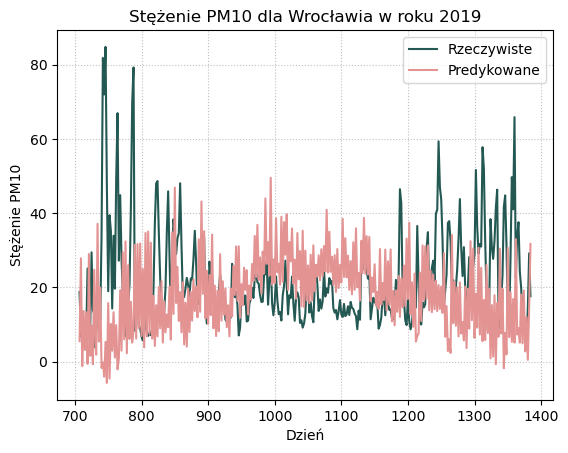

In [164]:
PM10_train_Wro=PM10_train.loc[PM10_train['City'] == 2]
PM10_test_Wro=PM10_test.loc[PM10_test['City'] == 2]

x_train = PM10_train_Wro[['Temperature', 'Wind']]
x_test = PM10_test_Wro[['Temperature', 'Wind']]
y_train = PM10_train_Wro[['Value']]
y_test = PM10_test_Wro[['Value']]
model = sm.OLS(y_train, x_train)
results = model.fit()

y_pred=results.predict(x_test)

# wykres wartości rzeczywistych i predykowanych
plt.plot(y_test, label='Rzeczywiste', color='#245953')
plt.plot(y_pred, label='Predykowane', color='#E49393')
plt.ylabel("Stężenie PM10")
plt.title("Stężenie PM10 dla Wrocławia w roku 2019")
plt.xlabel("Dzień")
plt.grid(color="silver",linestyle='dotted')
plt.legend()
plt.show()

In [165]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.352
Model:                            OLS   Adj. R-squared (uncentered):              0.351
Method:                 Least Squares   F-statistic:                              372.1
Date:                Thu, 04 May 2023   Prob (F-statistic):                   9.02e-130
Time:                        12:25:35   Log-Likelihood:                         -6493.3
No. Observations:                1371   AIC:                                  1.299e+04
Df Residuals:                    1369   BIC:                                  1.300e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [166]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# błąd średniokwadratowy (mean squared error - MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
print("MSE sqrt:", np.sqrt(mse))

#błąd średniowzględny (mean absolute error - MAE)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

#współczynnik determinacji R2
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MSE: 370.65745765607863
MSE sqrt: 19.25246627463813
MAE: 13.853731915867584
R2: -1.1888153028642878


## Gdańsk

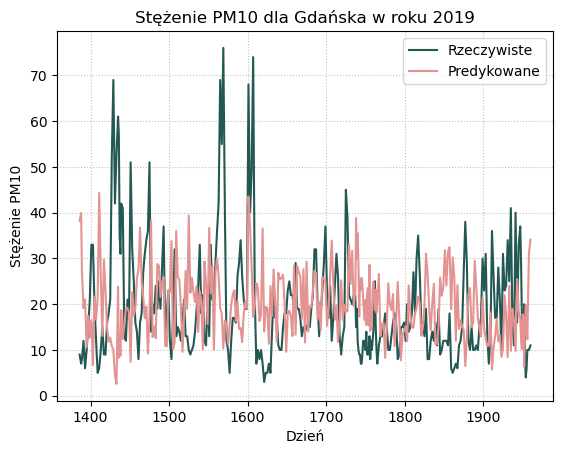

In [179]:
PM10_train_Gda=PM10_train.loc[PM10_train['City'] == 3]
PM10_test_Gda=PM10_test.loc[PM10_test['City'] == 3]

x_train = PM10_train_Gda[['Temperature', 'Wind']]
x_test = PM10_test_Gda[['Temperature', 'Wind']]
y_train = PM10_train_Gda[['Value']]
y_test = PM10_test_Gda[['Value']]
model = sm.OLS(y_train, x_train)
results = model.fit()

y_pred=results.predict(x_test)

# wykres wartości rzeczywistych i predykowanych
plt.plot(y_test, label='Rzeczywiste', color='#245953')
plt.plot(y_pred, label='Predykowane', color='#E49393')
plt.ylabel("Stężenie PM10")
plt.title("Stężenie PM10 dla Gdańska w roku 2019")
plt.xlabel("Dzień")
plt.grid(color="silver",linestyle='dotted')
plt.legend()
plt.show()

In [171]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.463
Model:                            OLS   Adj. R-squared (uncentered):              0.462
Method:                 Least Squares   F-statistic:                              596.3
Date:                Thu, 04 May 2023   Prob (F-statistic):                   1.83e-187
Time:                        13:35:50   Log-Likelihood:                         -6222.3
No. Observations:                1385   AIC:                                  1.245e+04
Df Residuals:                    1383   BIC:                                  1.246e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [172]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# błąd średniokwadratowy (mean squared error - MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
print("MSE sqrt:", np.sqrt(mse))

#błąd średniowzględny (mean absolute error - MAE)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

#współczynnik determinacji R2
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MSE: 246.54657887047418
MSE sqrt: 15.701801771467954
MAE: 11.687804707212521
R2: -0.6074030353669935


## Kraków

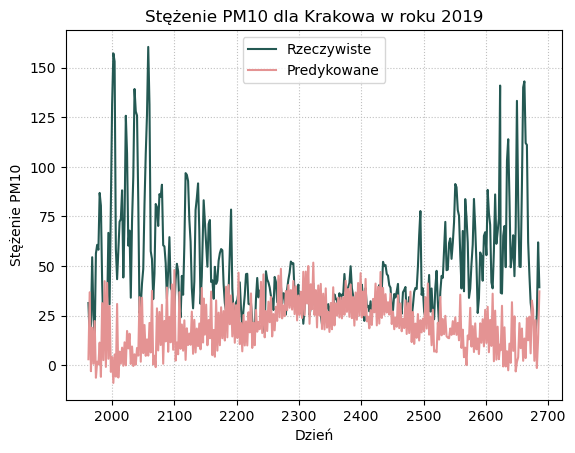

In [178]:
PM10_train_Kra=PM10_train.loc[PM10_train['City'] == 4]
PM10_test_Kra=PM10_test.loc[PM10_test['City'] == 4]

x_train = PM10_train_Kra[['Temperature', 'Wind']]
x_test = PM10_test_Kra[['Temperature', 'Wind']]
y_train = PM10_train_Kra[['Value']]
y_test = PM10_test_Kra[['Value']]
model = sm.OLS(y_train, x_train)
results = model.fit()

y_pred=results.predict(x_test)

# wykres wartości rzeczywistych i predykowanych
plt.plot(y_test, label='Rzeczywiste', color='#245953')
plt.plot(y_pred, label='Predykowane', color='#E49393')
plt.ylabel("Stężenie PM10")
plt.title("Stężenie PM10 dla Krakowa w roku 2019")
plt.xlabel("Dzień")
plt.grid(color="silver",linestyle='dotted')
plt.legend()
plt.show()

In [174]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.271
Model:                            OLS   Adj. R-squared (uncentered):              0.270
Method:                 Least Squares   F-statistic:                              255.1
Date:                Thu, 04 May 2023   Prob (F-statistic):                    6.25e-95
Time:                        13:53:13   Log-Likelihood:                         -7005.5
No. Observations:                1374   AIC:                                  1.401e+04
Df Residuals:                    1372   BIC:                                  1.403e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [175]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# błąd średniokwadratowy (mean squared error - MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
print("MSE sqrt:", np.sqrt(mse))

#błąd średniowzględny (mean absolute error - MAE)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

#współczynnik determinacji R2
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MSE: 2028.0670548221428
MSE sqrt: 45.03406549293704
MAE: 32.255833263167474
R2: -1.7957429259654756


## Katowice

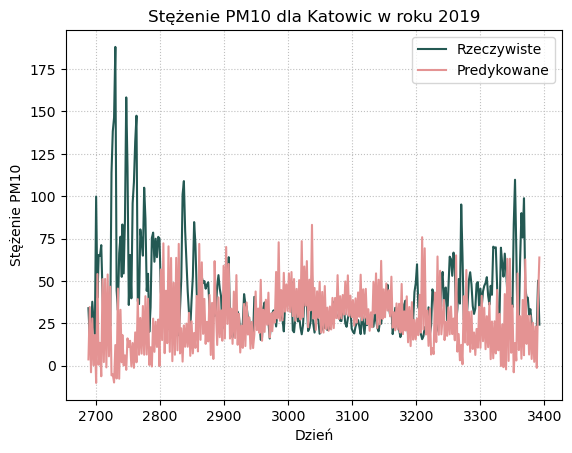

In [180]:
PM10_train_Kat=PM10_train.loc[PM10_train['City'] == 5]
PM10_test_Kat=PM10_test.loc[PM10_test['City'] == 5]

x_train = PM10_train_Kat[['Temperature', 'Wind']]
x_test = PM10_test_Kat[['Temperature', 'Wind']]
y_train = PM10_train_Kat[['Value']]
y_test = PM10_test_Kat[['Value']]
model = sm.OLS(y_train, x_train)
results = model.fit()

y_pred=results.predict(x_test)

# wykres wartości rzeczywistych i predykowanych
plt.plot(y_test, label='Rzeczywiste', color='#245953')
plt.plot(y_pred, label='Predykowane', color='#E49393')
plt.ylabel("Stężenie PM10")
plt.title("Stężenie PM10 dla Katowic w roku 2019")
plt.xlabel("Dzień")
plt.grid(color="silver",linestyle='dotted')
plt.legend()
plt.show()

In [181]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.281
Model:                            OLS   Adj. R-squared (uncentered):              0.280
Method:                 Least Squares   F-statistic:                              263.4
Date:                Thu, 04 May 2023   Prob (F-statistic):                    2.58e-97
Time:                        13:58:43   Log-Likelihood:                         -7203.3
No. Observations:                1352   AIC:                                  1.441e+04
Df Residuals:                    1350   BIC:                                  1.442e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [182]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# błąd średniokwadratowy (mean squared error - MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
print("MSE sqrt:", np.sqrt(mse))

#błąd średniowzględny (mean absolute error - MAE)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

#współczynnik determinacji R2
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MSE: 1466.7736474809078
MSE sqrt: 38.29848100748785
MAE: 26.386218518574996
R2: -1.3825387116546888
